### Integrace funkce jedné proměnné

#### Zadání:
V oblasti přírodních a sociálních věd je velice důležitým pojmem integrál, který představuje funkci součtů malých změn (počet nakažených covidem za čas, hustota monomerů daného typu při posouvání se v řetízku polymeru, aj.). Integraci lze provádět pro velmi jednoduché funkce prostou Riemannovým součtem, avšak pro složitější funkce je nutné využít pokročilé metody. Vaším úkolem je vybrat si 3 různorodé funkce (polynom, harmonická funkce, logaritmus/exponenciála) a vypočíst určitý integrál na dané funkci od nějakého počátku do nějakého konečného bodu. Porovnejte, jak si každá z metod poradila s vámi vybranou funkcí na základě přesnosti vůči analytickému řešení.

#### Vypracované řešení
1. Gaussova metoda numerické integrace
2. Obdelníková metoda
3. Lichoběžníková metoda

In [13]:
import numpy as np
from scipy import integrate
from typing import Callable

In [14]:
# Polynomální funkce
def function_polynomial(x):
    return x**3 - 2 * x**2 - 5 * x + 6


# Exponenciální funkce
def function_exponential(x):
    return np.exp(x) - 4


# Harmonická funkce
def function_harmonic(x):
    return np.sin(x)


# Gaussova kvadratura (Gaussova metoda numerické integrace)
def gaussian_quadrature(func: Callable, start: float = 0, end: float = 1):
    return integrate.fixed_quad(func, start, end)[0]


# Obdelníková metoda
def rectangle(function: Callable, a=0, b=1):
    return integrate.quad(function, a, b)[0]


# Lichoběžníková metoda
def trapezoid(function: Callable, a=0, b=1, n=100):
    x = np.linspace(a, b, n)
    return integrate.trapezoid(function(x), x)


# Analytické řešení
analytical_polynomial = 35 / 12
analytical_exponential = np.exp(1) - 5
analytical_harmonic = 1 - np.cos(1)

print(f"Polynomiální funkce: {analytical_polynomial}")
print(f"Exponenciální funkce: {analytical_exponential}")
print(f"Harmonická funkce: {analytical_harmonic}\n")

print("Výsledky integrace pro polynomální funkci:")
print(f"Gausova kvadratura: {gaussian_quadrature(function_polynomial)}")
print(f"Obdelníková metoda: {rectangle(function_polynomial)}")
print(f"Lichoběžníková metoda: {trapezoid(function_polynomial)}\n")

print("Výsledky integrace pro exponenciální funkci:")
print(f"Gausova kvadratura: {gaussian_quadrature(function_exponential)}")
print(f"Obdelníková metoda: {rectangle(function_exponential)}")
print(f"Lichoběžníková metoda: {trapezoid(function_exponential)}\n")

print("Výsledky integrace pro harmonickou funkci:")
print(f"Gausova metoda numerické integrace: {gaussian_quadrature(function_harmonic)}")
print(f"Obdelníková metoda: {rectangle(function_harmonic)}")
print(f"Lichoběžníková metoda: {trapezoid(function_harmonic)}\n")

Polynomiální funkce: 2.9166666666666665
Exponenciální funkce: -2.281718171540955
Harmonická funkce: 0.45969769413186023

Výsledky integrace pro polynomální funkci:
Gausova kvadratura: 3.083333333333334
Obdelníková metoda: 3.083333333333333
Lichoběžníková metoda: 3.0833248307995786

Výsledky integrace pro exponenciální funkci:
Gausova kvadratura: -2.2817181715416086
Obdelníková metoda: -2.2817181715409545
Lichoběžníková metoda: -2.2817035618165513

Výsledky integrace pro harmonickou funkci:
Gausova metoda numerické integrace: 0.4596976941320484
Obdelníková metoda: 0.45969769413186023
Lichoběžníková metoda: 0.4596937855300522



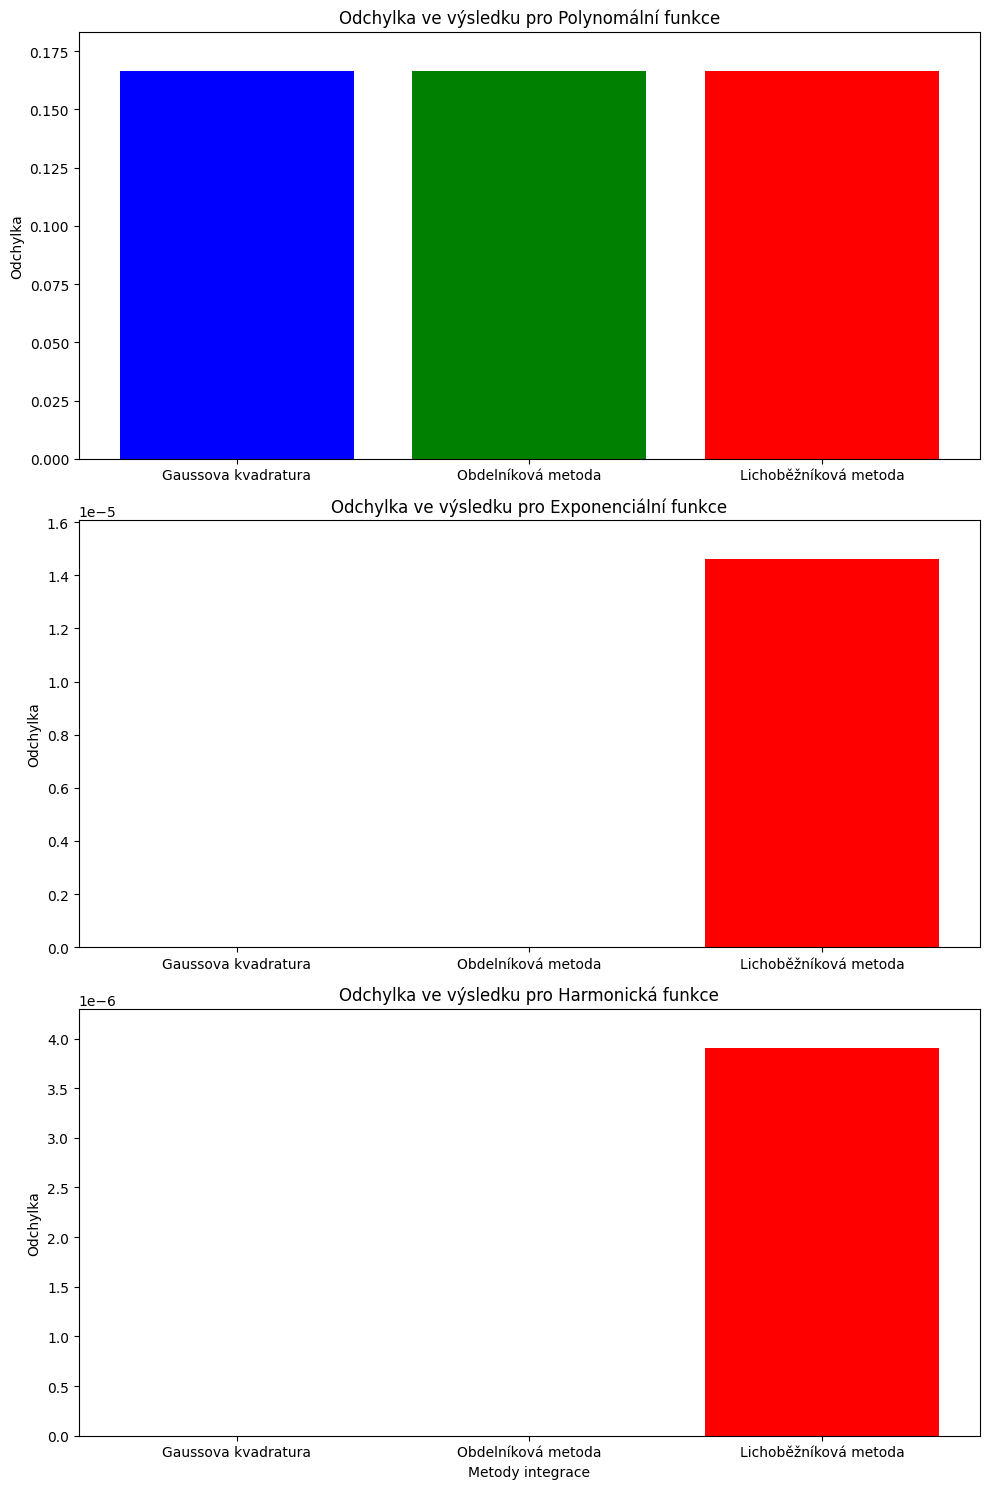

In [17]:
from matplotlib import pyplot as plt


methods = ["Gaussova kvadratura", "Obdelníková metoda", "Lichoběžníková metoda"]
functions = [
    ("Polynomální funkce", function_polynomial, analytical_polynomial),
    ("Exponenciální funkce", function_exponential, analytical_exponential),
    ("Harmonická funkce", function_harmonic, analytical_harmonic),
]
results = {
    "Polynomální funkce": [],
    "Exponenciální funkce": [],
    "Harmonická funkce": [],
}

for name, function, analytical_result in functions:
    gauss_result = gaussian_quadrature(function)
    rect_result = rectangle(function)
    trap_result = trapezoid(function)
    results[name].append((gauss_result, abs(gauss_result - analytical_result)))
    results[name].append((rect_result, abs(rect_result - analytical_result)))
    results[name].append((trap_result, abs(trap_result - analytical_result)))

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

for ax, (name, data) in zip(axes, results.items()):
    method_results = [x[0] for x in data]
    errors = [x[1] for x in data]

    ax.bar(methods, errors, color=["blue", "green", "red"])
    ax.set_title(f"Odchylka ve výsledku pro {name}")
    ax.set_ylabel("Odchylka")
    ax.set_ylim(0, max(errors) * 1.1)

plt.xlabel("Metody integrace")
plt.tight_layout()
plt.show()